In [1]:
from source import seasonalregressor
from source import data_wrangle
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import seaborn as sb
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
advanced = data_wrangle.read_all_advanced('./data/advanced')
pergame  = data_wrangle.read_all_pergame('./data/per_game')
seasonal = data_wrangle.clean_and_join_seasonal_dataframe(advanced, pergame)
demographic = data_wrangle.read_demographic_data('./data/player_data.csv')
fullstats = data_wrangle.add_years_in_league(seasonal, demographic)

In [78]:
fullstats.head().T

,0,1,2,3,4
Player,A.C. Green,A.C. Green,A.C. Green,A.C. Green,A.C. Green
Pos,PF,PF,PF,PF,PF
Age,33,34,35,36,37
Tm,TOT,DAL,DAL,LAL,MIA
G,83,82,50,82,82
MP_total,2492,2649,924,1929,1411
PER,12.4,12.8,12.5,11.2,11.2
TS%,0.523,0.496,0.441,0.482,0.492
3PAr,0.041,0.007,0.031,0.01,0.019
FTr,0.407,0.303,0.203,0.245,0.343


In [3]:
sr = seasonalregressor.SeasonalRegressor()
sr = sr.fit(fullstats,demographic)

Number of players:  578  with full season data for seasons: {1, 2, 3, 4, 5}
Indices of train set and to-predict set MATCH
Using all columns
Fitting for year: 5
Number of players:  496  with full season data for seasons: {1, 2, 3, 4, 5, 6}
Indices of train set and to-predict set MATCH
Using all columns
Fitting for year: 6
Number of players:  421  with full season data for seasons: {1, 2, 3, 4, 5, 6, 7}
Indices of train set and to-predict set MATCH
Using all columns
Fitting for year: 7
Number of players:  355  with full season data for seasons: {1, 2, 3, 4, 5, 6, 7, 8}
Indices of train set and to-predict set MATCH
Using all columns
Fitting for year: 8
Number of players:  306  with full season data for seasons: {1, 2, 3, 4, 5, 6, 7, 8, 9}
Indices of train set and to-predict set MATCH
Using all columns
Fitting for year: 9


In [4]:
firstfour = sr.get_players_first_x_full_years(fullstats)

Number of players:  699  with full season data for seasons: {1, 2, 3, 4}


In [5]:
fullpredictions = sr.predict(firstfour)

Predicting year: 5 for player:  Darius Songaila
Predicting year: 5 for player:  Tyreke Evans
Predicting year: 5 for player:  Patty Mills
Predicting year: 5 for player:  Damien Wilkins
Predicting year: 5 for player:  Jonathan Bender
Predicting year: 5 for player:  Lou Williams
Predicting year: 5 for player:  Tony Allen
Predicting year: 5 for player:  Dion Waiters
Predicting year: 5 for player:  Rasual Butler
Predicting year: 5 for player:  Eric Gordon
Predicting year: 5 for player:  Ronald Dupree
Predicting year: 5 for player:  Scott Padgett
Predicting year: 5 for player:  Jon Leuer
Predicting year: 5 for player:  Wally Szczerbiak
Predicting year: 5 for player:  Ronald Murray
Predicting year: 5 for player:  Elton Brand
Predicting year: 5 for player:  Raef LaFrentz
Predicting year: 5 for player:  Steven Adams
Predicting year: 5 for player:  James Posey
Predicting year: 5 for player:  Kenyon Martin
Predicting year: 5 for player:  John Salmons
Predicting year: 5 for player:  Linton Johnson

Predicting year: 5 for player:  Luke Walton
Predicting year: 5 for player:  Norris Cole
Predicting year: 5 for player:  JaVale McGee
Predicting year: 5 for player:  Ben Gordon
Predicting year: 5 for player:  Ryan Kelly
Predicting year: 5 for player:  Chucky Atkins
Predicting year: 5 for player:  LeBron James
Predicting year: 5 for player:  Joe Johnson
Predicting year: 5 for player:  Carlos Boozer
Predicting year: 5 for player:  Danny Green
Predicting year: 5 for player:  Jiri Welsch
Predicting year: 5 for player:  Brandon Bass
Predicting year: 5 for player:  Sergio Rodriguez
Predicting year: 5 for player:  Blake Griffin
Predicting year: 5 for player:  Brad Miller
Predicting year: 5 for player:  DaJuan Summers
Predicting year: 5 for player:  DeSagana Diop
Predicting year: 5 for player:  Eddy Curry
Predicting year: 5 for player:  Mike Miller
Predicting year: 5 for player:  Rodney Carney
Predicting year: 5 for player:  Paul Davis
Predicting year: 5 for player:  Jahidi White
Predicting yea

Predicting year: 5 for player:  Al Horford
Predicting year: 5 for player:  Jared Sullinger
Predicting year: 5 for player:  Chris Quinn
Predicting year: 5 for player:  Maurice Taylor
Predicting year: 5 for player:  Stephen Graham
Predicting year: 5 for player:  Yi Jianlian
Predicting year: 5 for player:  DeMarcus Cousins
Predicting year: 5 for player:  George Hill
Predicting year: 5 for player:  Ansu Sesay
Predicting year: 5 for player:  Mike James (i)
Predicting year: 5 for player:  Adrian Griffin
Predicting year: 5 for player:  Pablo Prigioni
Predicting year: 5 for player:  Anthony Randolph
Predicting year: 5 for player:  Jason Collier
Predicting year: 5 for player:  Dwight Powell
Predicting year: 5 for player:  Marc Jackson
Predicting year: 5 for player:  Noah Vonleh
Predicting year: 5 for player:  Quincy Acy
Predicting year: 5 for player:  Jusuf Nurkic
Predicting year: 5 for player:  Caron Butler
Predicting year: 5 for player:  Devin Harris
Predicting year: 5 for player:  Mario West

Predicting year: 5 for player:  Terrence Ross
Predicting year: 5 for player:  Tim Hardaway (ii)
Predicting year: 5 for player:  Otto Porter
Predicting year: 5 for player:  Robert Traylor
Predicting year: 5 for player:  Ricky Rubio
Predicting year: 5 for player:  Tim Frazier
Predicting year: 5 for player:  Lawrence Funderburke
Predicting year: 5 for player:  Paul Pierce
Predicting year: 5 for player:  Glen Davis
Predicting year: 5 for player:  Troy Hudson
Predicting year: 5 for player:  Derrick Favors
Predicting year: 5 for player:  Chris Copeland
Predicting year: 5 for player:  Bonzi Wells
Predicting year: 5 for player:  Matt Carroll
Predicting year: 5 for player:  Brian Roberts
Predicting year: 5 for player:  Tyronn Lue
Predicting year: 5 for player:  Jamal Sampson
Predicting year: 5 for player:  Kyle Anderson
Predicting year: 5 for player:  Othella Harrington
Predicting year: 5 for player:  Travis Knight
Predicting year: 5 for player:  Derek Fisher
Predicting year: 5 for player:  Jel

Predicting year: 6 for player:  Linton Johnson
Predicting year: 6 for player:  Rudy Fernandez
Predicting year: 6 for player:  Evan Fournier
Predicting year: 6 for player:  Rashard Lewis
Predicting year: 6 for player:  Tobias Harris
Predicting year: 6 for player:  Kerry Kittles
Predicting year: 6 for player:  Aron Baynes
Predicting year: 6 for player:  Brevin Knight
Predicting year: 6 for player:  J.J. Hickson
Predicting year: 6 for player:  Alec Burks
Predicting year: 6 for player:  Solomon Jones
Predicting year: 6 for player:  Andrew Nicholson
Predicting year: 6 for player:  Devin Brown
Predicting year: 6 for player:  Isaiah Canaan
Predicting year: 6 for player:  Keith Bogans
Predicting year: 6 for player:  Clint Capela
Predicting year: 6 for player:  Jason Maxiell
Predicting year: 6 for player:  Jamaal Magloire
Predicting year: 6 for player:  Andris Biedrins
Predicting year: 6 for player:  Martell Webster
Predicting year: 6 for player:  Michael Redd
Predicting year: 6 for player:  Ja

Predicting year: 6 for player:  Jahidi White
Predicting year: 6 for player:  Rick Brunson
Predicting year: 6 for player:  Brian Scalabrine
Predicting year: 6 for player:  Kobe Bryant
Predicting year: 6 for player:  Paul George
Predicting year: 6 for player:  DeJuan Blair
Predicting year: 6 for player:  Rashad McCants
Predicting year: 6 for player:  Brandon Roy
Predicting year: 6 for player:  Larry Sanders
Predicting year: 6 for player:  Alonzo Gee
Predicting year: 6 for player:  Bryce Drew
Predicting year: 6 for player:  Maurice Harkless
Predicting year: 6 for player:  Earl Clark
Predicting year: 6 for player:  Kyrie Irving
Predicting year: 6 for player:  Kendall Marshall
Predicting year: 6 for player:  Bobby Simmons
Predicting year: 6 for player:  Marcin Gortat
Predicting year: 6 for player:  DeShawn Stevenson
Predicting year: 6 for player:  Arron Afflalo
Predicting year: 6 for player:  JaMychal Green
Predicting year: 6 for player:  Tristan Thompson
Predicting year: 6 for player:  Wil

Predicting year: 6 for player:  Mario West
Predicting year: 6 for player:  Charlie Villanueva
Predicting year: 6 for player:  Aaron Brooks
Predicting year: 6 for player:  Mike Wilks
Predicting year: 6 for player:  Robin Lopez
Predicting year: 6 for player:  Predrag Drobnjak
Predicting year: 6 for player:  Craig Smith
Predicting year: 6 for player:  Shawn Marion
Predicting year: 6 for player:  Damone Brown
Predicting year: 6 for player:  Jared Dudley
Predicting year: 6 for player:  Dwayne Jones
Predicting year: 6 for player:  Shandon Anderson
Predicting year: 6 for player:  Zach LaVine
Predicting year: 6 for player:  Ronnie Brewer
Predicting year: 6 for player:  Eric Maynor
Predicting year: 6 for player:  Mike Sweetney
Predicting year: 6 for player:  Kedrick Brown
Predicting year: 6 for player:  Hilton Armstrong
Predicting year: 6 for player:  Pat Garrity
Predicting year: 6 for player:  Ben Wallace
Predicting year: 6 for player:  John Wallace
Predicting year: 6 for player:  Jake Tsakali

Predicting year: 6 for player:  Jelani McCoy
Predicting year: 6 for player:  Brian Cardinal
Predicting year: 6 for player:  Luc Mbah a Moute
Predicting year: 6 for player:  Timofey Mozgov
Predicting year: 6 for player:  Matt Bonner
Predicting year: 6 for player:  Sasha Pavlovic
Predicting year: 6 for player:  Kelvin Cato
Predicting year: 6 for player:  Todd Fuller
Predicting year: 6 for player:  Ike Diogu
Predicting year: 6 for player:  Chris Crawford
Predicting year: 6 for player:  Keon Clark
Predicting year: 6 for player:  Marcus Fizer
Predicting year: 6 for player:  Randy Foye
Predicting year: 6 for player:  Metta World Peace
Predicting year: 6 for player:  Ty Lawson
Predicting year: 6 for player:  Michael Stewart
Predicting year: 6 for player:  Jimmer Fredette
Predicting year: 6 for player:  Daniel Gibson
Predicting year: 6 for player:  Lonny Baxter
Predicting year: 6 for player:  Raymond Felton
Predicting year: 6 for player:  Boris Diaw
Predicting year: 6 for player:  Jason Thomps

Predicting year: 7 for player:  Jamaal Tinsley
Predicting year: 7 for player:  Alex Len
Predicting year: 7 for player:  Spencer Hawes
Predicting year: 7 for player:  Nate Robinson
Predicting year: 7 for player:  Josh McRoberts
Predicting year: 7 for player:  Bobby Jackson
Predicting year: 7 for player:  Randolph Morris
Predicting year: 7 for player:  Al Harrington
Predicting year: 7 for player:  Aaron Gordon
Predicting year: 7 for player:  Mateen Cleaves
Predicting year: 7 for player:  Seth Curry
Predicting year: 7 for player:  Tremaine Fowlkes
Predicting year: 7 for player:  Antawn Jamison
Predicting year: 7 for player:  Archie Goodwin
Predicting year: 7 for player:  Greivis Vasquez
Predicting year: 7 for player:  Tony Battie
Predicting year: 7 for player:  Reggie Williams (ii)
Predicting year: 7 for player:  Mark Hendrickson
Predicting year: 7 for player:  Adreian Payne
Predicting year: 7 for player:  Kelenna Azubuike
Predicting year: 7 for player:  Nene Hilario
Predicting year: 7 fo

Predicting year: 7 for player:  Will Barton
Predicting year: 7 for player:  J.J. Redick
Predicting year: 7 for player:  Steve Novak
Predicting year: 7 for player:  Markieff Morris
Predicting year: 7 for player:  DeAndre Jordan
Predicting year: 7 for player:  Carl Landry
Predicting year: 7 for player:  Solomon Hill
Predicting year: 7 for player:  Paul Millsap
Predicting year: 7 for player:  Kirk Snyder
Predicting year: 7 for player:  Roy Hibbert
Predicting year: 7 for player:  Gordan Giricek
Predicting year: 7 for player:  Thabo Sefolosha
Predicting year: 7 for player:  Danny Fortson
Predicting year: 7 for player:  David Harrison
Predicting year: 7 for player:  Langston Galloway
Predicting year: 7 for player:  Tony Snell
Predicting year: 7 for player:  Peja Stojakovic
Predicting year: 7 for player:  Vladimir Radmanovic
Predicting year: 7 for player:  Anthony Carter
Predicting year: 7 for player:  CJ McCollum
Predicting year: 7 for player:  C.J. Miles
Predicting year: 7 for player:  Carl

Predicting year: 7 for player:  Jake Tsakalidis
Predicting year: 7 for player:  Marcus Camby
Predicting year: 7 for player:  Hamed Haddadi
Predicting year: 7 for player:  Donnell Harvey
Predicting year: 7 for player:  Daequan Cook
Predicting year: 7 for player:  Andre Iguodala
Predicting year: 7 for player:  Shareef Abdur-Rahim
Predicting year: 7 for player:  Wesley Matthews
Predicting year: 7 for player:  Danilo Gallinari
Predicting year: 7 for player:  Kevin Martin
Predicting year: 7 for player:  Matt Maloney
Predicting year: 7 for player:  Rafer Alston
Predicting year: 7 for player:  Tyler Zeller
Predicting year: 7 for player:  Evan Turner
Predicting year: 7 for player:  Kareem Rush
Predicting year: 7 for player:  Enes Kanter
Predicting year: 7 for player:  Shabazz Napier
Predicting year: 7 for player:  Malcolm Thomas
Predicting year: 7 for player:  Gerald Wallace
Predicting year: 7 for player:  Joey Graham
Predicting year: 7 for player:  Malik Rose
Predicting year: 7 for player:  J

Predicting year: 7 for player:  Jason Thompson
Predicting year: 7 for player:  Amar'e Stoudemire
Predicting year: 7 for player:  Nick Collison
Predicting year: 7 for player:  Leon Powe
Predicting year: 7 for player:  Dennis Schroder
Predicting year: 7 for player:  Omri Casspi
Predicting year: 7 for player:  Allen Crabbe
Predicting year: 7 for player:  Erick Strickland
Predicting year: 7 for player:  Tyler Johnson
Predicting year: 7 for player:  Eric Bledsoe
Predicting year: 7 for player:  Ruben Patterson
Predicting year: 7 for player:  Juan Dixon
Predicting year: 7 for player:  Mikki Moore
Predicting year: 7 for player:  James Young
Predicting year: 7 for player:  Mason Plumlee
Predicting year: 7 for player:  Drew Gooden
Predicting year: 7 for player:  Anthony Tolliver
Predicting year: 7 for player:  Hedo Turkoglu
Predicting year: 7 for player:  Marcus Thornton
Predicting year: 7 for player:  Shabazz Muhammad
Predicting year: 7 for player:  Richard Hamilton
Predicting year: 7 for playe

Predicting year: 8 for player:  Kelenna Azubuike
Predicting year: 8 for player:  Nene Hilario
Predicting year: 8 for player:  DeMar DeRozan
Predicting year: 8 for player:  Andre Roberson
Predicting year: 8 for player:  Doug McDermott
Predicting year: 8 for player:  Matt Barnes
Predicting year: 8 for player:  Tiago Splitter
Predicting year: 8 for player:  Serge Ibaka
Predicting year: 8 for player:  Mehmet Okur
Predicting year: 8 for player:  Shammond Williams
Predicting year: 8 for player:  Andrew Wiggins
Predicting year: 8 for player:  Donald Sloan
Predicting year: 8 for player:  Jeremy Evans
Predicting year: 8 for player:  Jarron Collins
Predicting year: 8 for player:  Gary Harris
Predicting year: 8 for player:  Mike Conley
Predicting year: 8 for player:  Tyler Hansbrough
Predicting year: 8 for player:  Rudy Gay
Predicting year: 8 for player:  Draymond Green
Predicting year: 8 for player:  Jordan Crawford
Predicting year: 8 for player:  Quincy Pondexter
Predicting year: 8 for player: 

Predicting year: 8 for player:  CJ McCollum
Predicting year: 8 for player:  C.J. Miles
Predicting year: 8 for player:  Carlos Delfino
Predicting year: 8 for player:  Kenneth Faried
Predicting year: 8 for player:  Rodney Hood
Predicting year: 8 for player:  Marquis Daniels
Predicting year: 8 for player:  Raja Bell
Predicting year: 8 for player:  Henry Walker
Predicting year: 8 for player:  Bruno Sundov
Predicting year: 8 for player:  Kris Humphries
Predicting year: 8 for player:  Vitaly Potapenko
Predicting year: 8 for player:  Nikola Vucevic
Predicting year: 8 for player:  Kwame Brown
Predicting year: 8 for player:  Johan Petro
Predicting year: 8 for player:  Keith Van Horn
Predicting year: 8 for player:  Ish Smith
Predicting year: 8 for player:  Chuck Hayes
Predicting year: 8 for player:  Derek Anderson
Predicting year: 8 for player:  Jeff Withey
Predicting year: 8 for player:  Luke Babbitt
Predicting year: 8 for player:  Rasho Nesterovic
Predicting year: 8 for player:  Shelvin Mack
P

Predicting year: 8 for player:  Joey Graham
Predicting year: 8 for player:  Malik Rose
Predicting year: 8 for player:  John Henson
Predicting year: 8 for player:  Ramon Sessions
Predicting year: 8 for player:  Ed Davis
Predicting year: 8 for player:  Tony Delk
Predicting year: 8 for player:  Tyrus Thomas
Predicting year: 8 for player:  Reggie Jackson
Predicting year: 8 for player:  Delonte West
Predicting year: 8 for player:  Jordan Farmar
Predicting year: 8 for player:  Cedric Henderson
Predicting year: 8 for player:  C.J. Watson
Predicting year: 8 for player:  Bruce Bowen
Predicting year: 8 for player:  Emeka Okafor
Predicting year: 8 for player:  Jordan Hamilton
Predicting year: 8 for player:  Willie Green
Predicting year: 8 for player:  Devean George
Predicting year: 8 for player:  James Harden
Predicting year: 8 for player:  Isaiah Thomas
Predicting year: 8 for player:  Kyle O'Quinn
Predicting year: 8 for player:  Richard Jefferson
Predicting year: 8 for player:  Jarrett Jack
Pred

Predicting year: 8 for player:  Shabazz Muhammad
Predicting year: 8 for player:  Richard Hamilton
Predicting year: 8 for player:  Dexter Pittman
Predicting year: 8 for player:  David Lee
Predicting year: 8 for player:  Victor Oladipo
Predicting year: 8 for player:  Tim Thomas
Predicting year: 8 for player:  Tierre Brown
Predicting year: 8 for player:  John Wall
Predicting year: 8 for player:  Toney Douglas
Predicting year: 8 for player:  Keyon Dooling
Predicting year: 8 for player:  Jimmy Butler
Predicting year: 8 for player:  Stanislav Medvedenko
Predicting year: 8 for player:  Josh Childress
Predicting year: 8 for player:  Wilson Chandler
Predicting year: 8 for player:  Calvin Booth
Predicting year: 8 for player:  Steve Francis
Predicting year: 8 for player:  Jordan Hill
Predicting year: 8 for player:  Josh Boone
Predicting year: 8 for player:  Zendon Hamilton
Predicting year: 8 for player:  Antoine Wright
Predicting year: 8 for player:  J.J. Barea
Predicting year: 8 for player:  Gor

Predicting year: 9 for player:  Sebastian Telfair
Predicting year: 9 for player:  Chris Paul
Predicting year: 9 for player:  Jake Voskuhl
Predicting year: 9 for player:  Jonas Valanciunas
Predicting year: 9 for player:  Qyntel Woods
Predicting year: 9 for player:  Trevor Booker
Predicting year: 9 for player:  Stephen Curry
Predicting year: 9 for player:  Marcus Banks
Predicting year: 9 for player:  Luke Jackson
Predicting year: 9 for player:  Luther Head
Predicting year: 9 for player:  Francisco Garcia
Predicting year: 9 for player:  Gerald Green
Predicting year: 9 for player:  Mark Madsen
Predicting year: 9 for player:  Nikoloz Tskitishvili
Predicting year: 9 for player:  Jeff Green
Predicting year: 9 for player:  Al-Farouq Aminu
Predicting year: 9 for player:  Bostjan Nachbar
Predicting year: 9 for player:  Henry Sims
Predicting year: 9 for player:  Bojan Bogdanovic
Predicting year: 9 for player:  Donatas Motiejunas
Predicting year: 9 for player:  Darius Morris
Predicting year: 9 for

Predicting year: 9 for player:  Shelvin Mack
Predicting year: 9 for player:  Kyle Korver
Predicting year: 9 for player:  Viktor Khryapa
Predicting year: 9 for player:  Byron Mullens
Predicting year: 9 for player:  Gorgui Dieng
Predicting year: 9 for player:  Sean Kilpatrick
Predicting year: 9 for player:  Hollis Thompson
Predicting year: 9 for player:  Robert Covington
Predicting year: 9 for player:  Eddie Robinson
Predicting year: 9 for player:  Omer Asik
Predicting year: 9 for player:  Jermaine O'Neal
Predicting year: 9 for player:  James Michael McAdoo
Predicting year: 9 for player:  Kentavious Caldwell-Pope
Predicting year: 9 for player:  Malik Allen
Predicting year: 9 for player:  Mark Blount
Predicting year: 9 for player:  Chauncey Billups
Predicting year: 9 for player:  Brandon Knight
Predicting year: 9 for player:  Jamie Feick
Predicting year: 9 for player:  Luke Ridnour
Predicting year: 9 for player:  Marc Gasol
Predicting year: 9 for player:  Derrick Rose
Predicting year: 9 f

Predicting year: 9 for player:  Jarrett Jack
Predicting year: 9 for player:  Dan Gadzuric
Predicting year: 9 for player:  DeMarre Carroll
Predicting year: 9 for player:  Steve Nash
Predicting year: 9 for player:  Kent Bazemore
Predicting year: 9 for player:  Ricky Davis
Predicting year: 9 for player:  Giannis Antetokounmpo
Predicting year: 9 for player:  Trevor Ariza
Predicting year: 9 for player:  Michael Beasley
Predicting year: 9 for player:  Ryan Anderson
Predicting year: 9 for player:  Marreese Speights
Predicting year: 9 for player:  Patrick O'Bryant
Predicting year: 9 for player:  Ben McLemore
Predicting year: 9 for player:  Bruno Caboclo
Predicting year: 9 for player:  Brook Lopez
Predicting year: 9 for player:  Cartier Martin
Predicting year: 9 for player:  Udonis Haslem
Predicting year: 9 for player:  Yao Ming
Predicting year: 9 for player:  Allen Iverson
Predicting year: 9 for player:  Adonal Foyle
Predicting year: 9 for player:  Greg Smith
Predicting year: 9 for player:  Mi

Predicting year: 9 for player:  Gordon Hayward
Predicting year: 9 for player:  Jeff Teague
Predicting year: 9 for player:  T.J. Warren
Predicting year: 9 for player:  Joe Ingles
Predicting year: 9 for player:  Chase Budinger
Predicting year: 9 for player:  Terrence Jones
Predicting year: 9 for player:  Jared Cunningham
Predicting year: 9 for player:  Austin Croshere
Predicting year: 9 for player:  Erick Dampier
Predicting year: 9 for player:  Wang Zhizhi
Predicting year: 9 for player:  Travis Outlaw
Predicting year: 9 for player:  Chris Mihm
Predicting year: 9 for player:  Ryan Bowen
Predicting year: 9 for player:  Kosta Koufos
Predicting year: 9 for player:  Cory Joseph
Predicting year: 9 for player:  Joe Harris
Predicting year: 9 for player:  Tony Wroten
Predicting year: 9 for player:  Jason Collins
Predicting year: 9 for player:  Johnny O'Bryant
Predicting year: 9 for player:  Linas Kleiza
Predicting year: 9 for player:  Kirk Hinrich
Predicting year: 9 for player:  Aaron Gray
Predic

In [55]:
import importlib
importlib.reload(seasonalregressor)
sr2 = seasonalregressor.SeasonalRegressor()

In [23]:
fullpredictions['DeMar DeRozan']

[6.8269999999999955,
 2.995999999999999,
 1.8129999999999995,
 1.8490000000000004,
 2.2119999999999997]

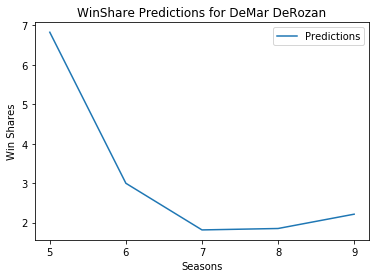

In [24]:
sr2.plot_player_arc('DeMar DeRozan', fullpredictions['DeMar DeRozan'])

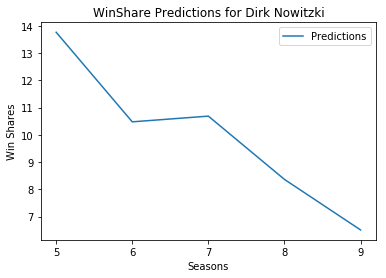

In [25]:
sr2.plot_player_arc('Dirk Nowitzki', fullpredictions['Dirk Nowitzki'])

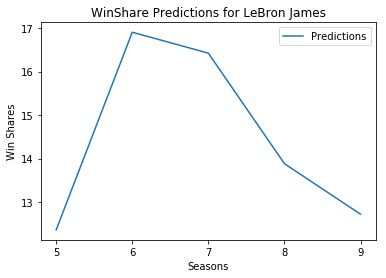

In [26]:
sr2.plot_player_arc('LeBron James', fullpredictions['LeBron James'])

In [39]:
seasons = 9
col = 'WS'

frame = fullstats.loc[(fullstats['Player']=='Dirk Nowitzki') & (fullstats['Seasons_number'] <= seasons), ['Seasons_number', col]]

In [44]:
x = frame['Seasons_number'].values
y = frame[col].values

In [47]:
x

array([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [50]:
importlib.reload(data_wrangle)

<module 'source.data_wrangle' from '/Users/kv/workspace/kv-capstone/NBAwinshare/source/data_wrangle.py'>

In [52]:
xlbj,ylbj = data_wrangle.get_actuals_for_first_x_years(fullstats, 'LeBron James',)

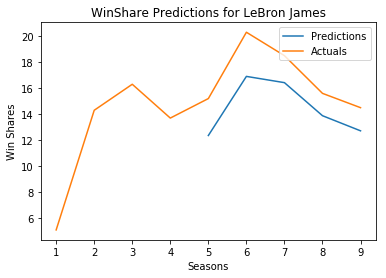

In [56]:
sr2.plot_player_arc('LeBron James', fullpredictions['LeBron James'], actuals = ylbj, actualseasons=xlbj)

In [57]:
xdem,ydem = data_wrangle.get_actuals_for_first_x_years(fullstats, 'DeMar DeRozan')

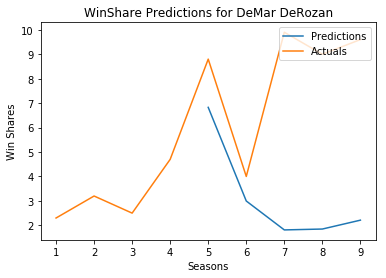

In [58]:
sr2.plot_player_arc('DeMar DeRozan', fullpredictions['DeMar DeRozan'], actuals = ydem, actualseasons=xdem)

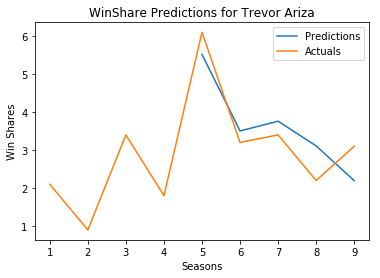

In [59]:
xtrev,ytrev = data_wrangle.get_actuals_for_first_x_years(fullstats, 'Trevor Ariza')
sr2.plot_player_arc('Trevor Ariza', fullpredictions['Trevor Ariza'], actuals = ytrev, actualseasons=xtrev)

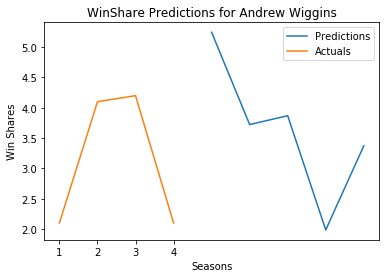

In [61]:
xdante,ydante = data_wrangle.get_actuals_for_first_x_years(fullstats, 'Andrew Wiggins')
sr2.plot_player_arc('Andrew Wiggins', fullpredictions['Andrew Wiggins'], actuals = ydante, actualseasons=xdante)

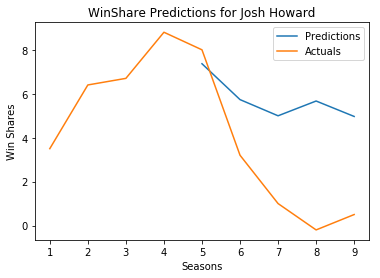

In [62]:
xdante,ydante = data_wrangle.get_actuals_for_first_x_years(fullstats, 'Josh Howard')
sr2.plot_player_arc('Josh Howard', fullpredictions['Josh Howard'], actuals = ydante, actualseasons=xdante)

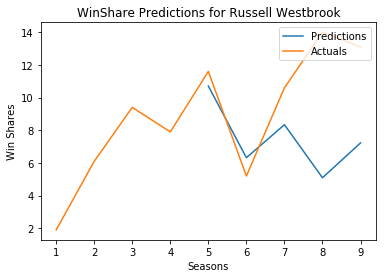

In [63]:
xdante,ydante = data_wrangle.get_actuals_for_first_x_years(fullstats, 'Russell Westbrook')
sr2.plot_player_arc('Russell Westbrook', fullpredictions['Russell Westbrook'], actuals = ydante, actualseasons=xdante)

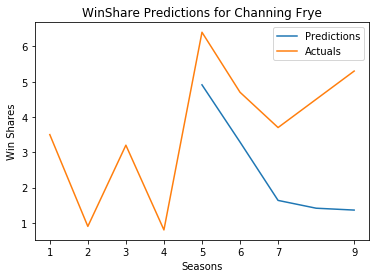

In [64]:
xdante,ydante = data_wrangle.get_actuals_for_first_x_years(fullstats, 'Channing Frye')
sr2.plot_player_arc('Channing Frye', fullpredictions['Channing Frye'], actuals = ydante, actualseasons=xdante)

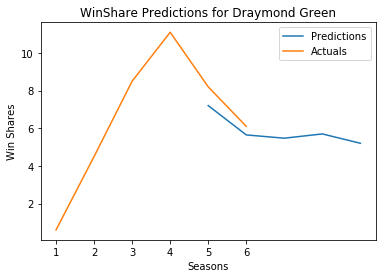

In [65]:
xdante,ydante = data_wrangle.get_actuals_for_first_x_years(fullstats, 'Draymond Green')
sr2.plot_player_arc('Draymond Green', fullpredictions['Draymond Green'], actuals = ydante, actualseasons=xdante)

In [76]:
list(fullstats.columns)

['Player',
 'Pos',
 'Age',
 'Tm',
 'G',
 'MP_total',
 'PER',
 'TS%',
 '3PAr',
 'FTr',
 'ORB%',
 'DRB%',
 'TRB%',
 'AST%',
 'STL%',
 'BLK%',
 'TOV%',
 'USG%',
 'OWS',
 'DWS',
 'WS',
 'WSp48',
 'OBPM',
 'DBPM',
 'BPM',
 'VORP',
 'Season',
 'Teams',
 'GS',
 'MP_pergame',
 'FG',
 'FGA',
 'FG%',
 '3P',
 '3PA',
 '3P%',
 '2P',
 '2PA',
 '2P%',
 'eFG%',
 'FT',
 'FTA',
 'FT%',
 'ORB',
 'DRB',
 'TRB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'PS/G',
 'Seasons_number']

In [83]:
importlib.reload(seasonalregressor)

<module 'source.seasonalregressor' from '/Users/kv/workspace/kv-capstone/NBAwinshare/source/seasonalregressor.py'>

In [85]:
sr2 = seasonalregressor.SeasonalRegressor()
sr2 = sr2.fit(fullstats,demographic)


Number of players:  578  with full season data for seasons: {1, 2, 3, 4, 5}
Indices of train set and to-predict set MATCH
Using all columns
Fitting for year: 5
Number of players:  496  with full season data for seasons: {1, 2, 3, 4, 5, 6}
Indices of train set and to-predict set MATCH
Using all columns
Fitting for year: 6
Number of players:  421  with full season data for seasons: {1, 2, 3, 4, 5, 6, 7}
Indices of train set and to-predict set MATCH
Using all columns
Fitting for year: 7
Number of players:  355  with full season data for seasons: {1, 2, 3, 4, 5, 6, 7, 8}
Indices of train set and to-predict set MATCH
Using all columns
Fitting for year: 8
Number of players:  306  with full season data for seasons: {1, 2, 3, 4, 5, 6, 7, 8, 9}
Indices of train set and to-predict set MATCH
Using all columns
Fitting for year: 9


In [86]:
sr2.column_names

['Age',
 'G',
 'MP_total',
 'PER',
 'TS%',
 '3PAr',
 'FTr',
 'ORB%',
 'DRB%',
 'TRB%',
 'AST%',
 'STL%',
 'BLK%',
 'TOV%',
 'USG%',
 'OWS',
 'DWS',
 'WS',
 'WSp48',
 'OBPM',
 'DBPM',
 'BPM',
 'VORP',
 'Season',
 'GS',
 'MP_pergame',
 'FG',
 'FGA',
 'FG%',
 '3P',
 '3PA',
 '3P%',
 '2P',
 '2PA',
 '2P%',
 'eFG%',
 'FT',
 'FTA',
 'FT%',
 'ORB',
 'DRB',
 'TRB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'PS/G',
 'Seasons_number']

Feature ranking:
1. feature 17 | WS | (0.266561)
2. feature 22 | VORP | (0.184613)
3. feature 15 | OWS | (0.079618)
4. feature 0 | Age | (0.029749)
5. feature 3 | PER | (0.028685)
6. feature 37 | FTA | (0.024780)
7. feature 19 | OBPM | (0.018768)
8. feature 16 | DWS | (0.015918)
9. feature 21 | BPM | (0.015377)
10. feature 36 | FT | (0.013647)
11. feature 1 | G | (0.012553)
12. feature 46 | PF | (0.012274)
13. feature 18 | WSp48 | (0.011779)
14. feature 38 | FT% | (0.011688)
15. feature 32 | 2P | (0.011535)
16. feature 24 | GS | (0.010866)
17. feature 41 | TRB | (0.010832)
18. feature 14 | USG% | (0.010814)
19. feature 23 | Season | (0.010262)
20. feature 13 | TOV% | (0.010133)
21. feature 8 | DRB% | (0.009847)
22. feature 6 | FTr | (0.009837)
23. feature 2 | MP_total | (0.009560)
24. feature 4 | TS% | (0.009487)
25. feature 47 | PS/G | (0.009417)
26. feature 10 | AST% | (0.009265)
27. feature 39 | ORB | (0.008925)
28. feature 34 | 2P% | (0.008644)
29. feature 31 | 3P% | (0.008369)
30.

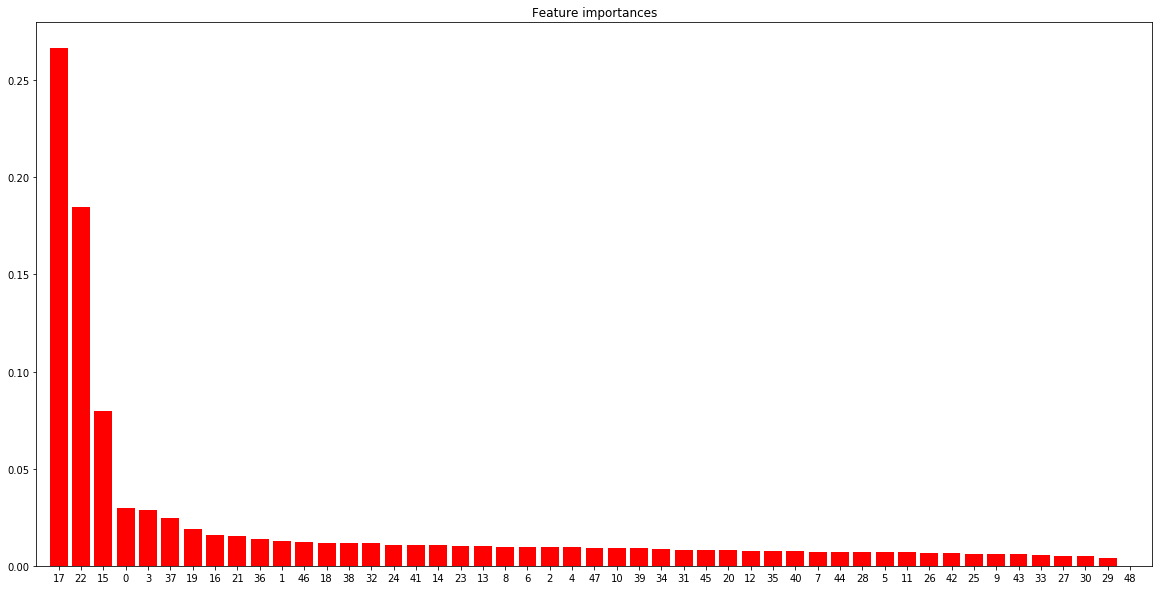

In [91]:
importances = sr2.regressor_dict[5].feature_importances_
indices = np.argsort(importances)[::-1]
# Print the feature ranking
print("Feature ranking:")

for f in range(len(sr2.column_names)):
    print("%d. feature %d | %s | (%f)" % (f + 1, indices[f], sr2.column_names[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(20,10))
plt.title("Feature importances")
plt.bar(range(len(sr2.column_names)), importances[indices],
       color="r", align="center")
plt.xticks(range(len(sr2.column_names)), indices)
plt.xlim([-1, len(sr2.column_names)])
plt.show()

In [92]:
cols_to_train_from_correlation = ['WS',
 'OWS',
 'VORP',
 'DWS',
 'MP_total',
 'PS/G',
 'FG',
 'MP_pergame',
 'GS',
 'FT',
 '2P',
 'FTA',
 'FGA',
 '2PA',
 'DRB']

In [93]:
cols_to_train_from_correlation

['WS',
 'OWS',
 'VORP',
 'DWS',
 'MP_total',
 'PS/G',
 'FG',
 'MP_pergame',
 'GS',
 'FT',
 '2P',
 'FTA',
 'FGA',
 '2PA',
 'DRB']